In [208]:
import json
import pandas as pd
import staticmap
from staticmap import StaticMap, CircleMarker

In [209]:
f=open("./data/train_reviews.json")
train_data=json.load(f)
f.close()
f = open("./data/test_reviews.json")
test_data = json.load(f)
f.close()

json_data = train_data + test_data

In [210]:
json_data[0]

{'position': 20,
 'title': 'The Capital Grille',
 'place_id': 'ChIJTXb6QRdawokRPZZKPYmvWcU',
 'data_id': '0x89c25a1741fa764d:0xc559af893d4a963d',
 'data_cid': '14220590302372730429',
 'gps_coordinates': {'latitude': 40.7081174, 'longitude': -74.0102264},
 'rating': 4.6,
 'reviews': 1157,
 'price': '$$$$',
 'type': 'Fine dining restaurant',
 'address': '120 Broadway, New York, NY 10271',
 'open_state': 'Closed ⋅ Opens 11:30AM',
 'hours': 'Opens at 11:30 AM',
 'phone': '(212) 374-1811',
 'website': 'https://www.thecapitalgrille.com/locations/ny/new-york/nyc-wall-street/8039?cmpid=br:tcg_ag:ie_ch:loc_ca:TCGGMB_sn:gmb_gt:new-york-ny-8039_pl:locurl_rd:1035',
 'description': 'Upscale chophouse chain with clubby look. Outpost of the upscale steakhouse chain offers classic American fare & a clubby, refined setting.',
 'thumbnail': 'https://lh5.googleusercontent.com/p/AF1QipNckk9j56zyqBsfLVCujjlgCVfSbdgvvinrkDhl=w92-h92-k-no',
 'reviews_data': [{'user': {'name': 'Dr Josh Brower',
    'link': 'h

## Keep only restaurants in Barcelona

In [211]:
data = [] # GUARDAR EL INDICE Y QUITARLO DE JSON
points = []
for r in json_data:
    place_id = r["place_id"]
    latitude = r["gps_coordinates"]["latitude"]
    longitude = r["gps_coordinates"]["longitude"]
    data.append((place_id, latitude, longitude))
    points.append((latitude, longitude))
    
df = pd.DataFrame(data, columns=['place_id', 'latitude', 'longitude'])

Text(0.5, 0, 'longitude')

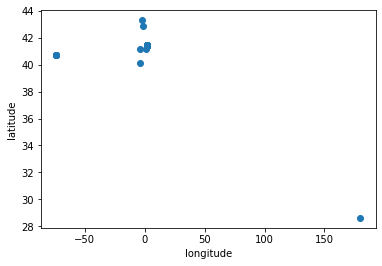

In [212]:
import matplotlib.pyplot as plt
x_val = [x[0] for x in points]
y_val = [x[1] for x in points]
plt.scatter(y_val, x_val)
plt.ylabel('latitude')
plt.xlabel('longitude')

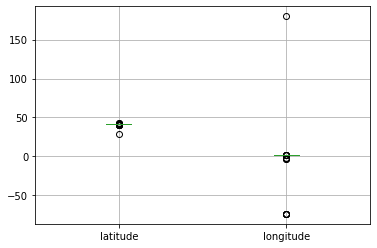

In [213]:
df.boxplot(return_type='axes')

In [214]:
Q1 = df['latitude'].quantile(0.25)
Q3 = df['latitude'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['latitude'] >= Q1 - 1.5 * IQR) & (df['latitude'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]

In [215]:
place_id_bcn = list(df.place_id.unique())

In [216]:
json_bcn = [x for x in json_data if x["place_id"] in place_id_bcn]

In [217]:
json_bcn[0]

{'position': 12,
 'title': 'Maoz',
 'place_id': 'ChIJefD4APiipBIRgyI_ff4Qhxc',
 'data_id': '0x12a4a2f800f8f079:0x178710fe7d3f2283',
 'data_cid': '1695342469937308291',
 'gps_coordinates': {'latitude': 41.3808593, 'longitude': 2.1746778},
 'rating': 4.5,
 'reviews': 1500,
 'price': '$',
 'type': 'Vegan restaurant',
 'address': 'Carrer de Ferran, 13, 08002 Barcelona, Spain',
 'open_state': 'Open ⋅ Closes 11PM',
 'hours': 'Open until 11:00 PM',
 'phone': '+34 678 60 49 46',
 'website': 'http://www.maozusa.com/',
 'description': 'Pit stop for Middle Eastern veggie fare. Middle Eastern vegetarian chain for counter-serve falafel & more, with serve-yourself toppings.',
 'service_options': {'dine_in': True, 'takeout': True},
 'thumbnail': 'https://lh5.googleusercontent.com/p/AF1QipPjnvCWXspnVIM9o3SMA_ZDUzmjvjyQASWAbUZY=w137-h92-k-no',
 'reviews_data': [{'user': {'name': 'OlekoBoom',
    'link': 'https://www.google.com/maps/contrib/102348760718259857950?hl=en-US&sa=X&ved=2ahUKEwj55L_A5P7zAhXL3J

## Remove backslash from username

In [218]:
for r in json_bcn:
    for rev in r["reviews_data"]:
        rev["user"]["name"].replace("/", "")

## Price to int

In [219]:
for r in json_bcn:
    try:
        r["price"] = min(4, len(r["price"]))
    except:
        r["price"] = 2

In [221]:
for r in json_bcn:
    try:
        print(r["type"])
    except:
        print("***")

Vegan restaurant
Italian restaurant
Bar & grill
Fast food restaurant
Mexican restaurant
Turkish restaurant
Hotel
Tapas restaurant
Small plates restaurant
Galician restaurant
Seafood restaurant
Filipino restaurant
Restaurant
Kosher restaurant
Argentinian restaurant
Spanish restaurant
Mediterranean restaurant
Hotel
Restaurant
Restaurant
Italian restaurant
Turkish restaurant
Restaurant
Mediterranean restaurant
Restaurant
Indian restaurant
Restaurant
Fine dining restaurant
Mediterranean restaurant
Restaurant
Restaurant
Restaurant
Restaurant
Mediterranean restaurant
Galician restaurant
Mediterranean restaurant
Bar & grill
Restaurant
Vegetarian restaurant
Lebanese restaurant
Latin American restaurant
Restaurant
Restaurant
Italian restaurant
Pizza restaurant
Lebanese restaurant
Italian restaurant
Grill
Fine dining restaurant
Mediterranean restaurant
Mediterranean restaurant
Vegetarian restaurant
Restaurant
Tapas bar
Italian restaurant
Fine dining restaurant
Restaurant
Bar & grill
Association 

## Save the data

In [177]:
f_data = open("./data/data.json", "w")
json.dump(json_bcn, f_data)
f_data.close()

## Plot the restaurants on a map

In [178]:
BBox = (df.longitude.min(), df.longitude.max(), df.latitude.min(), df.latitude.max())
BBox

(2.0869101, 2.2183364, 41.356697, 41.42046)

In [179]:
map = StaticMap(750, 750)
for idx, row in df.iterrows():
    marker = CircleMarker([row["longitude"], row["latitude"]], 'red', 4)
    marker_outline = CircleMarker([row["longitude"], row["latitude"]], 'black', 8)
    map.add_marker(marker_outline)
    map.add_marker(marker)
image = map.render()
image.save("restaurant_map.png")

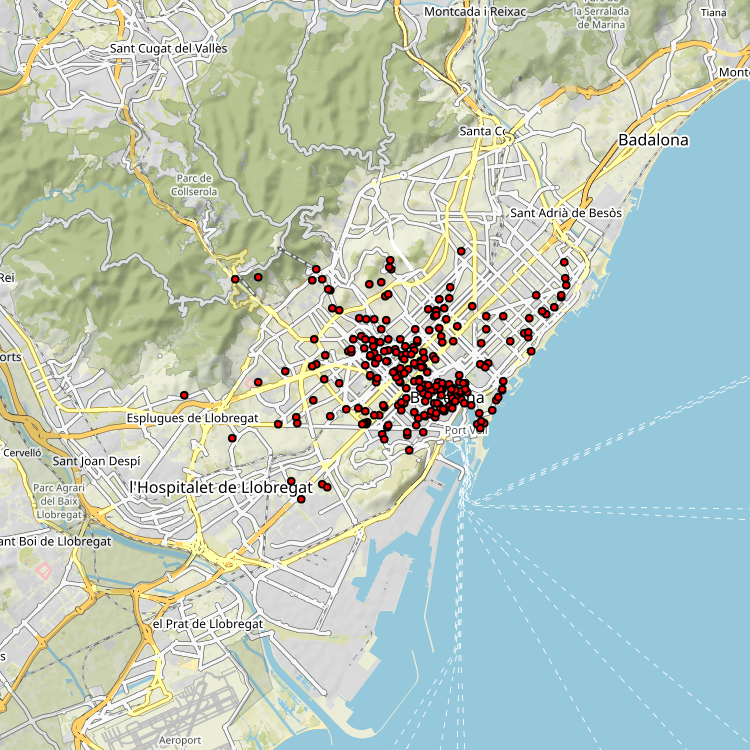

In [180]:
image